# Domain diagrams

This notebook creates the domain diagram figures.

# Imports

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import skfmm

from matplotlib import rc
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = [r'\usepackage{bm}']

from matplotlib.colors import LinearSegmentedColormap
import matplotlib.cm as cm
cmap = cm.get_cmap('Greys')
color = cmap(.5)

cdict_phi_grey = { 
    'red':  ((0.0, 1., 1.), (0.5, .7,.7), (1.0, color[0], color[0])),
    'green':((0.0, 1., 1.), (0.5, .7,.7), (1.0, color[0], color[0])),
    'blue': ((0.0, 1., 1.), (0.5, .7,.7), (1.0, color[0], color[0])),}
#     'alpha':((0.0, 1., 0.0), (0.1, 0.0, 0.0), (1.0, 1., 1.))  }
cmap_phi = LinearSegmentedColormap('cmap_phi', cdict_phi_grey)
plt.register_cmap(cmap=cmap_phi)

# Asymptotic diagrams

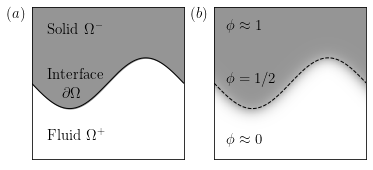

In [9]:
x = np.linspace(0,2,500,endpoint=False)
z = np.linspace(0,2,500,endpoint=False)
xx, zz = np.meshgrid(x,z,indexing='ij')
h = (1 + np.sin(-np.pi*x)/3)
d0 = h[:,None]-zz
d = skfmm.distance(d0,dx=float(x[1]-x[0]),periodic=(True,False))
f = 0.5*(1 - np.tanh(d/0.1))

xs = np.linspace(0,2,20,endpoint=True)
zs = (1 + np.sin(-np.pi*xs)/3)
dxs = (xs[1]-xs[0])*np.ones_like(xs)
dzs = dxs*np.pi*np.cos(np.pi*xs)/3
nabs = np.sqrt(dxs**2 + dzs**2)
nxs =-dzs/nabs
nzs = dxs/nabs
eps = .1
xps = xs + eps*nxs
zps = zs + eps*nzs
xms = xs - eps*nxs
zms = zs - eps*nzs

fig, ax = plt.subplots(1,2,figsize=(6,3))
ax[0].fill_between(x,h.flatten(),2,color=color)
ax[0].plot(x,h.flatten(),'k',linewidth=1)
ax[1].pcolormesh(xx,zz,f,cmap='cmap_phi',vmin=0,vmax=1,edgecolors='face')
ax[1].contour(xx,zz,d,[0.],colors='k',linewidths=1,linestyles='--')

for i, axi in enumerate(ax):
    ax[i].set(ylim=[0,2],xlim=[0,2],aspect=1,xticks=[],yticks=[])
ax[0].text(.2,1.7,r'Solid $\Omega^-$',fontsize=15,horizontalalignment='left',verticalalignment='center')
ax[0].text(.2,1.1,r'Interface',fontsize=15,horizontalalignment='left',verticalalignment='center')
ax[0].text(.4,.85,r'$\partial \Omega$',fontsize=15,horizontalalignment='left',verticalalignment='center')
ax[0].text(.2,.3,r'Fluid $\Omega^+$',fontsize=15,horizontalalignment='left',verticalalignment='center')
ax[0].text(-.07,2.,'$(a)$',fontsize=15,horizontalalignment='right',verticalalignment='top')
ax[1].text(.15,1.75,r'$\phi \approx 1$',fontsize=15,horizontalalignment='left',verticalalignment='center')
ax[1].text(.15,1.05,r'$\phi = 1/2$',fontsize=15,horizontalalignment='left',verticalalignment='center')
ax[1].text(.15,.25,r'$\phi \approx 0$',fontsize=15,horizontalalignment='left',verticalalignment='center')
ax[1].text(-.07,2.,'$(b)$',fontsize=15,horizontalalignment='right',verticalalignment='top')
plt.savefig('sharp-vs-phase-diagram.png',dpi=500,bbox_inches='tight')